<a href="https://colab.research.google.com/github/JosDeleon/Seminario-Profesional-I/blob/master/Copia_de_lesson3_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [2]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

# Testing an existing classifier

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

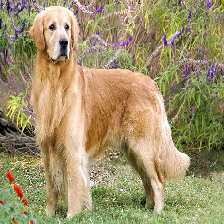

In [6]:
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [7]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [8]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [9]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

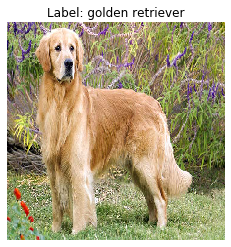

In [11]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

# Transfer Learning

## Build the dataset

In [0]:
class_names = ['onion','orange']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'onion')  
train_im_dir = os.path.join(train_dir, 'orange')  
validation_ca_dir = os.path.join(validation_dir, 'onion') 
validation_im_dir = os.path.join(validation_dir, 'orange')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [15]:
queries = ['vegetables','onion','healt','food']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='onion'+query, numberImage=50)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=onionvegetables&source=lnms&tbm=isch
Total Time : 0:00:04.484948
Invalid image:  89.jpg cannot identify image file '/content/Images/89.jpg'
Invalid image:  25.jpg cannot write mode P as JPEG
Invalid image:  49.jpg cannot write mode RGBA as JPEG
Invalid image:  95.jpg cannot write mode RGBA as JPEG
Invalid image:  35.jpg cannot write mode RGBA as JPEG
Invalid image:  27.jpg cannot write mode P as JPEG
Invalid image:  79.jpg cannot identify image file '/content/Images/79.jpg'
Invalid image:  65.jpg cannot identify image file '/content/Images/65.jpg'
https://www.google.co.in/search?q=oniononion&source=lnms&tbm=isch
Total Time : 0:00:00.000338
Invalid image:  89.jpg cannot identify image file '/content/Images/89.jpg'
Invalid image:  25.jpg cannot write mode P as JPEG
Invalid image:  49.jpg cannot write mode RGBA as JPEG
Invalid image:  95.jpg cannot write mode RGBA as JPEG
Invalid image:  35.jpg cannot write mode RGBA as JPEG
Invalid image:  27.jpg cannot 

In [16]:
queries = ['fruit','orange','healt','food']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='orange'+query, numberImage=50)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=orangefruit&source=lnms&tbm=isch
Error  HTTPConnectionPool(host='fr2land.com', port=80): Max retries exceeded with url: /wp-content/uploads/2019/06/fr2land.com-Orange.png (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fdd60456fd0>: Failed to establish a new connection: [Errno 110] Connection timed out',))
Invalid image:  89.jpg cannot identify image file '/content/Images/89.jpg'
Invalid image:  19.jpg cannot identify image file '/content/Images/19.jpg'
Invalid image:  24.jpg cannot identify image file '/content/Images/24.jpg'
Invalid image:  95.jpg cannot write mode RGBA as JPEG
Invalid image:  15.jpg cannot identify image file '/content/Images/15.jpg'
Invalid image:  79.jpg cannot identify image file '/content/Images/79.jpg'
Invalid image:  65.jpg cannot identify image file '/content/Images/65.jpg'
https://www.google.co.in/search?q=orangeorange&source=lnms&tbm=isch
Error  HTTPConnectionPool(host='i2.istockimg.com', port

In [17]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

total training Captain America images: 332
total training Iron Man images: 320
total validation Captain America images: 40
total validation Iron Man images: 40
--
Total training images: 652
Total validation images: 80


## Using the dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [19]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 652 images belonging to 2 classes.


In [20]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 80 images belonging to 2 classes.


## Testing the classifier

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [22]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [23]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['cleaver', 'fig', 'candle', 'orange', 'French loaf', 'pillow',
       'tobacco shop', 'scale', 'orange', 'Crock Pot', 'spaghetti squash',
       'frying pan', 'jigsaw puzzle', 'web site', 'corn', 'candle',
       'pelican', 'gong', 'ladle', 'knot', 'frying pan', 'scale',
       'restaurant', 'toilet seat', 'envelope', 'potpie', 'potpie',
       'restaurant', 'restaurant', 'menu', 'web site', 'envelope'],
      dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

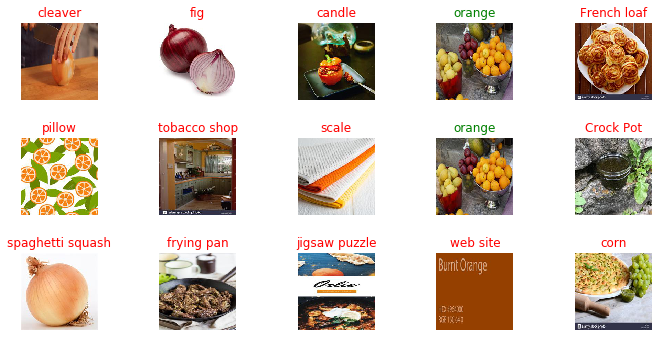

In [25]:
plot_images(image_batch, labels_batch, predicted_class_names)

## Downloading headless model

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [28]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## Adding a classification head

In [30]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


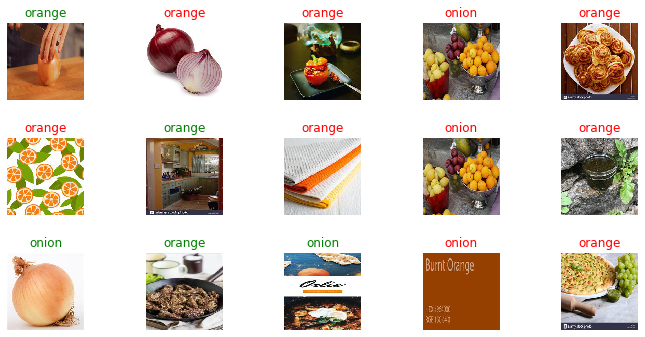

In [31]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 35s 7s/step - loss: 1.7161 - accuracy: 0.5188 - val_loss: 1.4002 - val_accuracy: 0.5375
Epoch 2/5
5/5 [==============================] - 31s 6s/step - loss: 1.8188 - accuracy: 0.5813 - val_loss: 1.4794 - val_accuracy: 0.5250
Epoch 3/5
5/5 [==============================] - 31s 6s/step - loss: 1.0974 - accuracy: 0.6438 - val_loss: 0.9081 - val_accuracy: 0.5500
Epoch 4/5
5/5 [==============================] - 29s 6s/step - loss: 1.0002 - accuracy: 0.6071 - val_loss: 0.7258 - val_accuracy: 0.5750
Epoch 5/5
5/5 [==============================] - 29s 6s/step - loss: 0.6084 - accuracy: 0.7000 - val_loss: 0.9476 - val_accuracy: 0.5125


## Check results

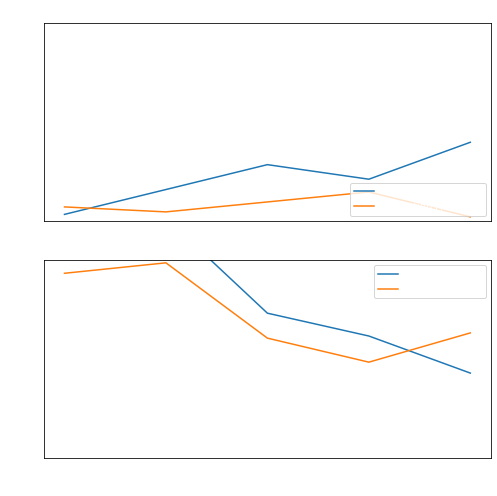

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

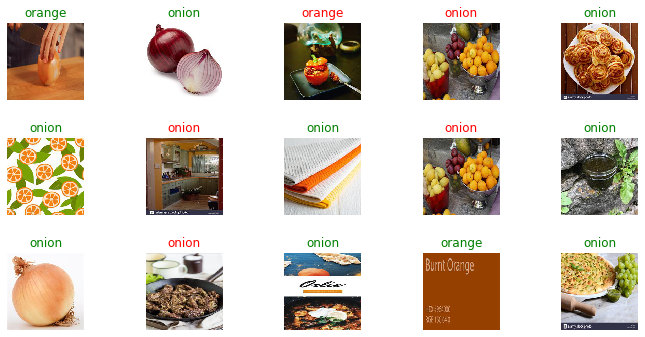

In [35]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

##Application base model

In [0]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

In [0]:
base_model.trainable = False

In [38]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [39]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 40s 8s/step - loss: 1.0807 - accuracy: 0.5562 - val_loss: 1.6539 - val_accuracy: 0.5500
Epoch 2/5
5/5 [==============================] - 37s 7s/step - loss: 0.9499 - accuracy: 0.6313 - val_loss: 0.9640 - val_accuracy: 0.6000
Epoch 3/5
5/5 [==============================] - 37s 7s/step - loss: 0.9791 - accuracy: 0.6250 - val_loss: 0.9812 - val_accuracy: 0.5875
Epoch 4/5
5/5 [==============================] - 36s 7s/step - loss: 0.6348 - accuracy: 0.7063 - val_loss: 0.9368 - val_accuracy: 0.5875
Epoch 5/5
5/5 [==============================] - 37s 7s/step - loss: 0.7211 - accuracy: 0.6625 - val_loss: 1.0350 - val_accuracy: 0.5625


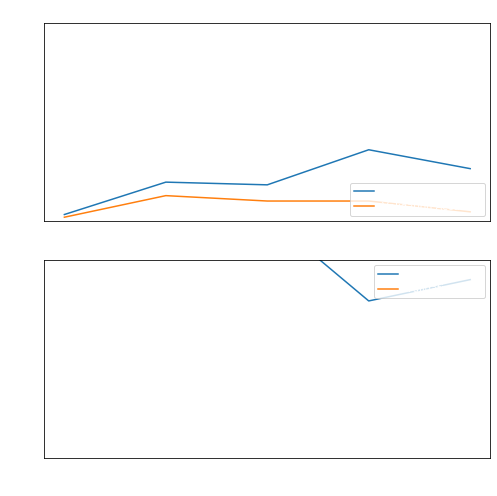

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

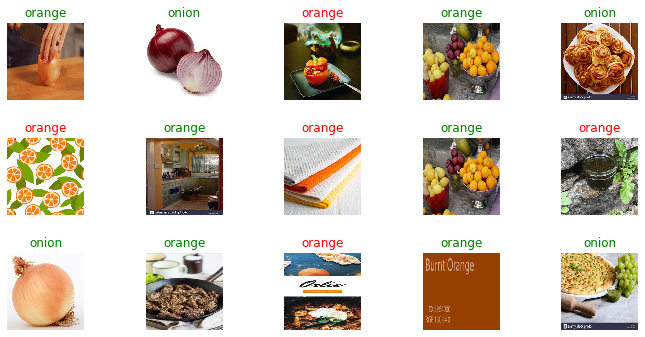

In [43]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Fine tuning

In [0]:
base_model.trainable = True

In [45]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  190


In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [47]:
initial_epochs = 5
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 5/10
5/5 [==============================] - 52s 10s/step - loss: 0.9427 - accuracy: 0.6500 - val_loss: 2.0092 - val_accuracy: 0.6125
Epoch 6/10
5/5 [==============================] - 48s 10s/step - loss: 0.7066 - accuracy: 0.6000 - val_loss: 38.1720 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 43s 9s/step - loss: 0.6208 - accuracy: 0.6857 - val_loss: 107.0533 - val_accuracy: 0.5000
Epoch 8/10
5/5 [==============================] - 48s 10s/step - loss: 0.5445 - accuracy: 0.6438 - val_loss: 372.0980 - val_accuracy: 0.5000
Epoch 9/10
5/5 [==============================] - 43s 9s/step - loss: 0.5851 - accuracy: 0.7143 - val_loss: 657.3154 - val_accuracy: 0.5000
Epoch 10/10
5/5 [==============================] - 48s 10s/step - loss: 0.5887 - accuracy: 0.6500 - val_loss: 666.0662 - val_accuracy: 0.5000


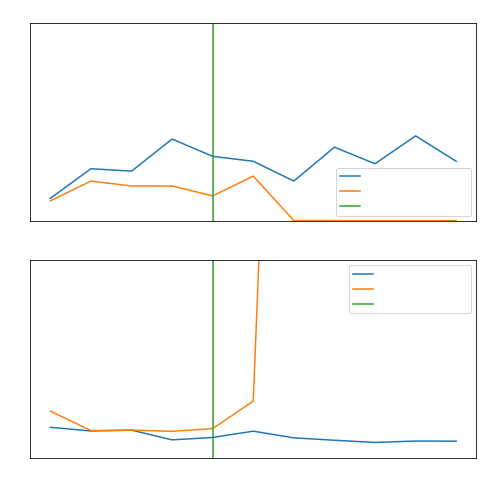

In [48]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

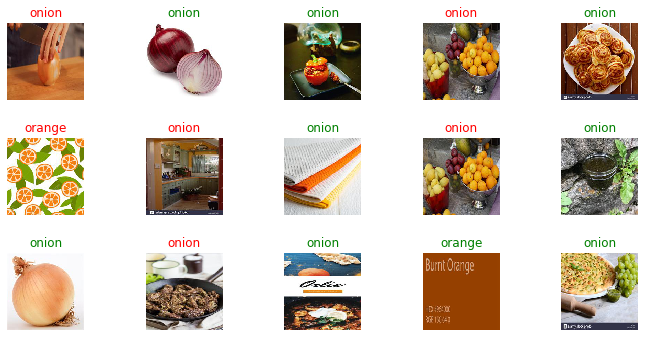

In [49]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)